In [1]:
import pandas as pd
import datetime
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
        #print(dfs[-1])
    return pd.concat(dfs)

In [2]:
## IMPORTING in df1 MTA DATA FOR YEAR 2021
week_nums = [211225, 211218, 211211, 211204,
             211127, 211120, 211113, 211106,
             211030, 211023, 211016, 211009, 211002,
             210925, 210918, 210911, 210904,
             210828, 210821, 210814, 210807,
             210731, 210724, 210717, 210710, 210703,
             210626, 210619, 210612, 210605,
             210529, 210522, 210515, 210508, 210501,
             210424, 210417, 210410, 210403,
             210327, 210320, 210313, 210306,
             210227, 210220, 210213, 210206,
             210130, 210123, 210116, 210109, 210102
            ]
df1 = get_data(week_nums)
df1.columns = [column.strip() for column in df1.columns]
df1["DATE_TIME"] = pd.to_datetime(df1.DATE + " " + df1.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df1.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
df1.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [3]:
## IMPORTING in df2 MTA DATA FOR YEAR 2019
week_nums = [191228, 191221, 191214, 191207,
             191130, 191123, 191116, 191109,191102,
             191026, 191019, 191012, 191005,
             190928, 190921, 190914, 190907,
             190831, 190824, 190817, 190810,190803,
             190727, 190720, 190713, 190706, 
             190629, 190622, 190615, 190608, 190601,
             190525, 190518, 190511, 190504,
             190427, 190420, 190413, 190406,
             190330, 190323, 190316, 190309,190302,
             190223, 190216, 190209, 190202,
             190126, 190119, 190112, 190105
            ]

df2 = get_data(week_nums)
df2.columns = [column.strip() for column in df2.columns]
df2["DATE_TIME"] = pd.to_datetime(df2.DATE + " " + df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df2.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
df2.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)






In [4]:
## IMPORTING in df3 MTA DATA FOR YEAR 2020
week_nums = [201226, 201219, 201212, 201205,
             201128, 201121, 201114, 201107,
             201031, 201024, 201017, 201010, 201003,
             200926, 200919, 200912, 200905,
             200829, 200822, 200815, 200808, 200801,
             200725, 200718, 200711, 200704,
             200627, 200620, 200613, 200606,
             200530, 200523, 200516, 200509, 200502,
             200425, 200418, 200411, 200404,
             200328, 200321, 200314, 200307,
             200229, 200222, 200215, 200208, 200201,
             200125, 200118, 200111, 200104]
df3 = get_data(week_nums)
df3.columns = [column.strip() for column in df3.columns]
df3["DATE_TIME"] = pd.to_datetime(df3.DATE + " " + df3.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df3.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
df3.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)




In [5]:
#REFERENCE FROM MTA EXERCISE 2 SOLUTION -- TAKING CARE IF CUMULATIVE COUNTER GET RESET TO ZERO OR A MAX COUNTER NUMBER
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        counter = min(row["EXITS"], row["PREV EXITS"])
    if counter > max_counter:
        return 0
    return counter

In [7]:
del(df1_counter)
#del(df2_counter)
#del(df3_counter)

NameError: name 'df1_counter' is not defined

In [8]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df1_counter = df1[((df1["STATION"] == 'JKSN HT-ROOSVLT') & (df1["LINENAME"] == 'EFMR7'))]

df1_counter[['PREV DATE_TIME','PREV EXITS']] = df1_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'EXITS'].apply(lambda x: x.shift(1))
df1_counter.dropna(subset = ["PREV DATE_TIME"], axis = 0,inplace = True)
df1_counter["DAILY EXITS"]= df1_counter.apply(get_daily_counts, axis=1, max_counter=400000)

df1_counter.drop(df1_counter[(df1_counter['DATE_TIME'].dt.year == 2020)].index , axis = 0, inplace = True)




/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/3197948800.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_counter[['PREV DATE_TIME','PREV EXITS']] = df1_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'EXITS'].apply(lambda x: x.shift(1))
/Users/divyauppal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/divyauppal/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [9]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df2_counter = df2[((df2["STATION"] == 'JKSN HT-ROOSVLT') & (df2["LINENAME"] == 'EFMR7'))]

df2_counter[['PREV DATE_TIME','PREV EXITS']] = df2_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'EXITS'].apply(lambda x: x.shift(1))
df2_counter.dropna(subset = ["PREV DATE_TIME"], axis = 0,inplace = True)
df2_counter["DAILY EXITS"]= df2_counter.apply(get_daily_counts, axis=1, max_counter=400000)

df2_counter.drop(df2_counter[(df2_counter['DATE_TIME'].dt.year == 2018)].index , axis = 0, inplace = True)





/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/902341964.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_counter[['PREV DATE_TIME','PREV EXITS']] = df2_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'EXITS'].apply(lambda x: x.shift(1))
/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/902341964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_counter["DAILY EXITS"]= df2_counter.apply(get_daily_counts, axis=1, max_counter=400000)


In [43]:
df1.STATION == WTC' 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,2020-12-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00


In [10]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df3_counter = df3[((df3["STATION"] == 'JKSN HT-ROOSVLT') & (df3["LINENAME"] == 'EFMR7'))]

df3_counter[['PREV DATE_TIME','PREV EXITS']] = df3_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'EXITS'].apply(lambda x: x.shift(1))
df3_counter.dropna(subset = ["PREV DATE_TIME"], axis = 0,inplace = True)
df3_counter["DAILY EXITS"]= df3_counter.apply(get_daily_counts, axis=1, max_counter=400000)

df3_counter.drop(df3_counter[(df3_counter['DATE_TIME'].dt.year == 2019)].index , axis = 0, inplace = True)





/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/2297053184.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3_counter[['PREV DATE_TIME','PREV EXITS']] = df3_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'EXITS'].apply(lambda x: x.shift(1))
/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/2297053184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_counter["DAILY EXITS"]= df3_counter.apply(get_daily_counts, axis=1, max_counter=400000)


/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/4187146264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_counter['BIN'] = pd.cut(x = df1_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72119/4187146264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_counter['BIN'] = pd.cut(x = df2_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
/var/folders/gw/wvwjhy9x

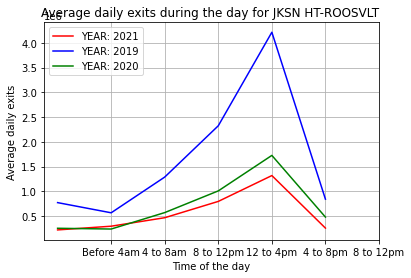

In [11]:
#Analyzing Daily Hourly Data and putting them in bin accordingly

import matplotlib.pyplot as plt
df1_counter.sort_values(by = "DAILY EXITS", ascending = False)
df1_counter['BIN'] = pd.cut(x = df1_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
df1_day = df1_counter.groupby("BIN")["DAILY EXITS"].sum()


df2_counter.sort_values(by = "DAILY EXITS", ascending = False)
df2_counter['BIN'] = pd.cut(x = df2_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
df2_day = df2_counter.groupby("BIN")["DAILY EXITS"].sum()


df3_counter.sort_values(by = "DAILY EXITS", ascending = False)
df3_counter['BIN'] = pd.cut(x = df3_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
df3_day = df3_counter.groupby("BIN")["DAILY EXITS"].sum()






plt.plot(df1_day,label = 'YEAR: 2021', color = 'red')
plt.plot(df2_day, label = 'YEAR: 2019', color = 'blue')
plt.plot(df3_day, label = 'YEAR: 2020', color = 'green')
plt.xticks([1,2,3,4,5,6],['Before 4am','4 to 8am', '8 to 12pm','12 to 4pm','4 to 8pm','8 to 12pm'])
plt.xlabel("Time of the day")
plt.ylabel("Average daily exits")
plt.title("Average daily exits during the day for JKSN HT-ROOSVLT ")
plt.grid()
plt.legend()
plt.show()




In [12]:
df1_counter

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV DATE_TIME,PREV EXITS,DAILY EXITS,BIN
85219,N323,R018,01-00-00,JKSN HT-ROOSVLT,EFMR7,IND,01/01/2021,03:00:00,REGULAR,28455,29816,2021-01-01 03:00:00,2020-12-31 23:00:00,29790.0,26.0,1
85220,N323,R018,01-00-00,JKSN HT-ROOSVLT,EFMR7,IND,01/01/2021,07:00:00,REGULAR,28477,29825,2021-01-01 07:00:00,2021-01-01 03:00:00,29816.0,9.0,2
85221,N323,R018,01-00-00,JKSN HT-ROOSVLT,EFMR7,IND,01/01/2021,11:00:00,REGULAR,28583,29896,2021-01-01 11:00:00,2021-01-01 07:00:00,29825.0,71.0,3
85222,N323,R018,01-00-00,JKSN HT-ROOSVLT,EFMR7,IND,01/01/2021,15:00:00,REGULAR,28712,30032,2021-01-01 15:00:00,2021-01-01 11:00:00,29896.0,136.0,4
85223,N323,R018,01-00-00,JKSN HT-ROOSVLT,EFMR7,IND,01/01/2021,19:00:00,REGULAR,28827,30227,2021-01-01 19:00:00,2021-01-01 15:00:00,30032.0,195.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86469,N324,R018,00-06-03,JKSN HT-ROOSVLT,EFMR7,IND,12/24/2021,07:00:00,REGULAR,8739240,2447253,2021-12-24 07:00:00,2021-12-24 03:00:00,2447246.0,7.0,2
86470,N324,R018,00-06-03,JKSN HT-ROOSVLT,EFMR7,IND,12/24/2021,11:00:00,REGULAR,8739630,2447296,2021-12-24 11:00:00,2021-12-24 07:00:00,2447253.0,43.0,3
86471,N324,R018,00-06-03,JKSN HT-ROOSVLT,EFMR7,IND,12/24/2021,15:00:00,REGULAR,8739877,2447373,2021-12-24 15:00:00,2021-12-24 11:00:00,2447296.0,77.0,4
86472,N324,R018,00-06-03,JKSN HT-ROOSVLT,EFMR7,IND,12/24/2021,19:00:00,REGULAR,8740070,2447536,2021-12-24 19:00:00,2021-12-24 15:00:00,2447373.0,163.0,5
